Boxplot

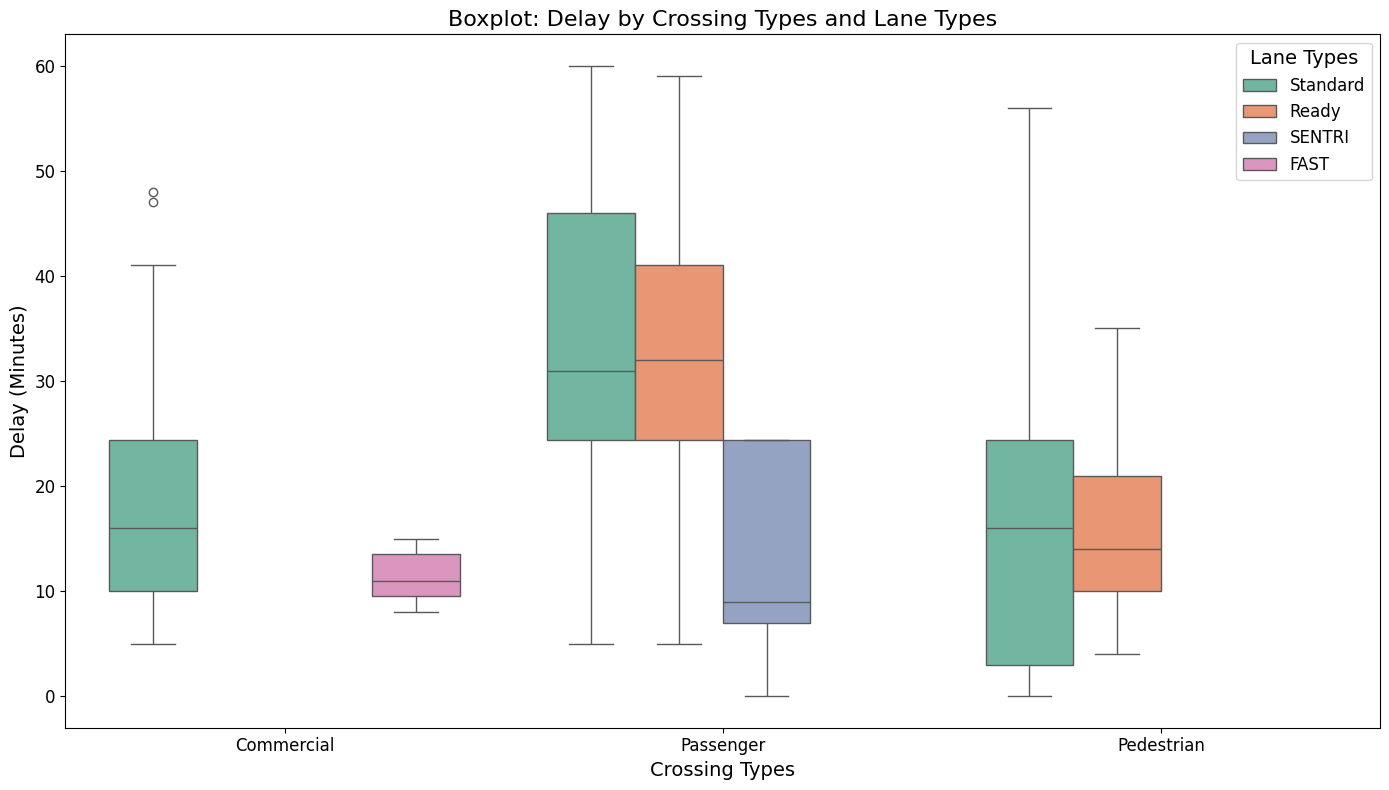

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# โหลดข้อมูล (อัปเดตพาธตามไฟล์ของคุณ)
data = pd.read_csv('E:/JOB/Task2_Clean/cleaned_dataset.csv')

# ตรวจสอบว่ามีคอลัมน์ที่จำเป็นในข้อมูล
required_columns = ['Crossing Types', 'Lane Types', 'Delay']
if all(col in data.columns for col in required_columns):
    # แปลงชื่อคอลัมน์เป็นรูปแบบที่เหมาะสม (ถ้ามีช่องว่าง)
    data.rename(columns=lambda x: x.strip(), inplace=True)

    # กำหนดขนาดของกราฟ
    plt.figure(figsize=(14, 8))

    # สร้าง Boxplot โดยใช้ Crossing Types และ Lane Types
    sns.boxplot(
        data=data,
        x='Crossing Types',
        y='Delay',
        hue='Lane Types',  # แยกข้อมูลตามประเภทเลน
        palette='Set2'
    )

    # ปรับแต่งกราฟ
    plt.title('Boxplot: Delay by Crossing Types and Lane Types', fontsize=16)
    plt.xlabel('Crossing Types', fontsize=14)
    plt.ylabel('Delay (Minutes)', fontsize=14)
    plt.legend(title='Lane Types', fontsize=12, title_fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # แสดงกราฟ
    plt.tight_layout()
    plt.show()
else:
    print("The dataset does not contain the necessary columns.")

    


ROC Curve

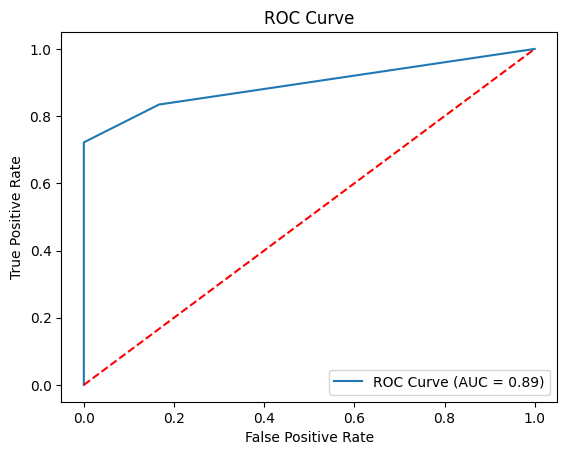

In [12]:
from sklearn.metrics import roc_curve, auc

y_prob = rf_model.predict_proba(X_test)[:, 1]  # ใช้ Probability ของ class 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], "r--")  # เส้นฐาน (Random Guess)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


Predict Logistic Regression

Train Set (y_train_balanced) Distribution:
Delay
1    0.5
0    0.5
Name: proportion, dtype: float64

Test Set (y_test) Distribution:
Delay
1    0.975
0    0.025
Name: proportion, dtype: float64
Available features in X_train:
Index(['Lane Types_Ready', 'Lane Types_SENTRI', 'Lane Types_Standard',
       'Crossing Types_Passenger', 'Crossing Types_Pedestrian',
       'County_San Diego'],
      dtype='object')
Feature 'Lane Types_Ready' will be used instead.


C:\Users\oak_1\AppData\Local\Temp\ipykernel_7472\1618365553.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\oak_1\AppData\Local\Temp\ipykernel_7472\1618365553.py:72: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[feature], label='Train', shade=True)
C:\Users\oak_1\AppData\Local\Temp\ipykernel_7472\1618365553.py:73: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test[feature], label='Test', shade=True)


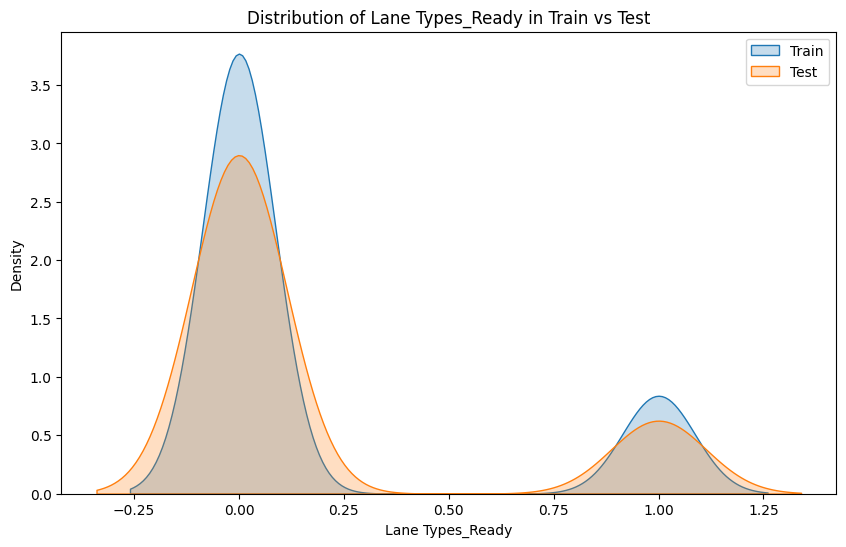

KS Test for Lane Types_Ready: Statistic=0.004648819060416559, p-value=1.0

Mean of Features by Set:
       Lane Types_Ready  Lane Types_SENTRI  Lane Types_Standard  \
Set                                                               
Test           0.177273           0.168182             0.652273   
Train          0.181922           0.172825             0.639568   

       Crossing Types_Passenger  Crossing Types_Pedestrian  County_San Diego  
Set                                                                           
Test                   0.543182                   0.354545          0.429545  
Train                  0.513928                   0.363843          0.406481  
=== Train Set Performance ===
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1715
           1       0.94      0.84      0.89      1715

    accuracy                           0.89      3430
   macro avg       0.90      0.89      0.89      3430
weighted avg 

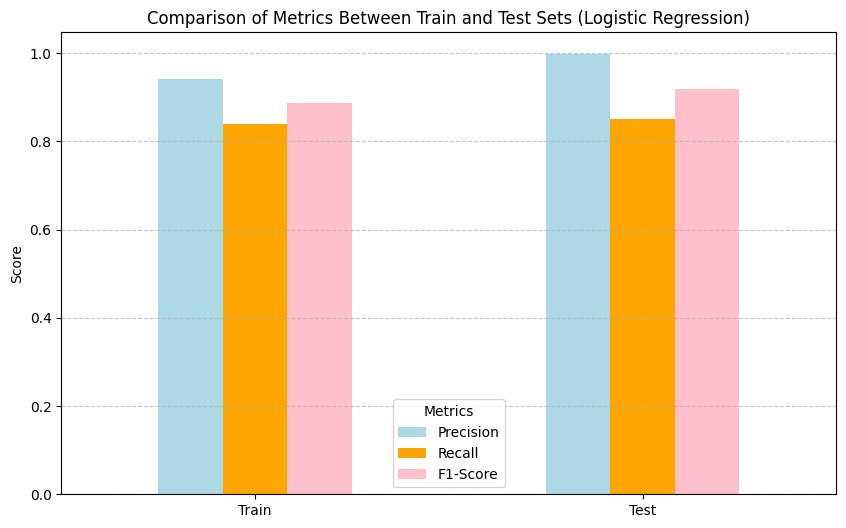

In [3]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

try:
    import imblearn
except ModuleNotFoundError:
    raise ModuleNotFoundError("The 'imblearn' library is not installed. Please install it using 'pip install imbalanced-learn'.")

file_path = 'E:/JOB/Task2_Clean/cleaned_dataset.csv'
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file {file_path} does not exist.")

df = pd.read_csv(file_path)

# แปลงคอลัมน์ Date ให้เป็นตัวเลข (ถ้ามี)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Date'] = (df['Date'] - pd.Timestamp("1970-01-01")).dt.days

# แยกตัวแปรต้น (X) และตัวแปรตาม (y)
if 'Delay' not in df.columns:
    raise ValueError("The dataset does not contain the required 'Delay' column.")

X = df[['Lane Types', 'Crossing Types', 'Date', 'County']]
y = (df['Delay'] > 0.5).astype(int)  # แปลง Delay ให้เป็น Binary (0 หรือ 1)

# เข้ารหัสตัวแปรหมวดหมู่
X = pd.get_dummies(X, drop_first=True)

# ตัดคอลัมน์ Date ออก
X = X.drop(columns=['Date'], errors='ignore')

# แบ่งข้อมูลเป็น Train และ Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# แปลง y_train ให้เป็น int เพื่อหลีกเลี่ยงปัญหา
y_train = y_train.astype(int)

# แปลงคอลัมน์ boolean ใน X_train ให้เป็น numeric (int)
X_train = X_train.astype(int)

# ปรับสมดุลข้อมูลใน Train Set ด้วย SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# ตรวจสอบการกระจายข้อมูล
print("Train Set (y_train_balanced) Distribution:")
print(pd.Series(y_train_balanced).value_counts(normalize=True))

print("\nTest Set (y_test) Distribution:")
print(y_test.value_counts(normalize=True))

# วิเคราะห์การกระจายของฟีเจอร์
print("Available features in X_train:")
print(X_train.columns)

# เลือกฟีเจอร์ใหม่หาก 'Lane_Types_Ready' ไม่อยู่ในข้อมูล
feature = 'Lane_Types_Ready'
if feature not in X_train.columns:
    feature = X_train.columns[0]  # เลือกฟีเจอร์แรกใน Dataset แทน
    print(f"Feature '{feature}' will be used instead.")

# วิเคราะห์การกระจายตัวของฟีเจอร์ที่เลือก
plt.figure(figsize=(10, 6))
sns.kdeplot(X_train[feature], label='Train', shade=True)
sns.kdeplot(X_test[feature], label='Test', shade=True)
plt.title(f"Distribution of {feature} in Train vs Test")
plt.legend()
plt.show()

# Kolmogorov-Smirnov Test
stat, p_value = ks_2samp(X_train[feature], X_test[feature])
print(f"KS Test for {feature}: Statistic={stat}, p-value={p_value}")

# เปรียบเทียบข้อมูลโดยใช้ค่าเฉลี่ยของแต่ละกลุ่ม
X_train['Set'] = 'Train'
X_test['Set'] = 'Test'
combined = pd.concat([X_train, X_test], ignore_index=True)

# แสดงค่ากลางของแต่ละฟีเจอร์
print("\nMean of Features by Set:")
print(combined.groupby('Set').mean())

# สร้างและฝึกโมเดล Logistic Regression
model = LogisticRegression(random_state=42, max_iter=1000)

# ลบคอลัมน์ 'Set' ออกจาก Train Set ก่อนการ Train
if 'Set' in X_train_balanced.columns:
    X_train_balanced = X_train_balanced.drop(columns=['Set'])

model.fit(X_train_balanced, y_train_balanced)

# ทำการทำนายบน Train และ Test Set
# ลบคอลัมน์ 'Set' ออกจาก Test Set ก่อนการ Predict
if 'Set' in X_test.columns:
    X_test = X_test.drop(columns=['Set'])

y_train_pred = model.predict(X_train_balanced)
y_test_pred = model.predict(X_test)

# วัดประสิทธิภาพของโมเดล
print("=== Train Set Performance ===")
print(classification_report(y_train_balanced, y_train_pred))
print(f"Train Accuracy: {accuracy_score(y_train_balanced, y_train_pred):.2f}")

print("\n=== Test Set Performance ===")
print(classification_report(y_test, y_test_pred))
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")

# วาดกราฟเปรียบเทียบค่า Precision, Recall, และ F1-Score
# คำนวณ Metrics สำหรับ Train และ Test
metrics = {
    'Precision': [
        precision_score(y_train_balanced, y_train_pred),
        precision_score(y_test, y_test_pred)
    ],
    'Recall': [
        recall_score(y_train_balanced, y_train_pred),
        recall_score(y_test, y_test_pred)
    ],
    'F1-Score': [
        f1_score(y_train_balanced, y_train_pred),
        f1_score(y_test, y_test_pred)
    ]
}

metrics_df = pd.DataFrame(metrics, index=['Train', 'Test'])

# วาดกราฟ
metrics_df.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'orange', 'pink'])
plt.title('Comparison of Metrics Between Train and Test Sets (Logistic Regression)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
